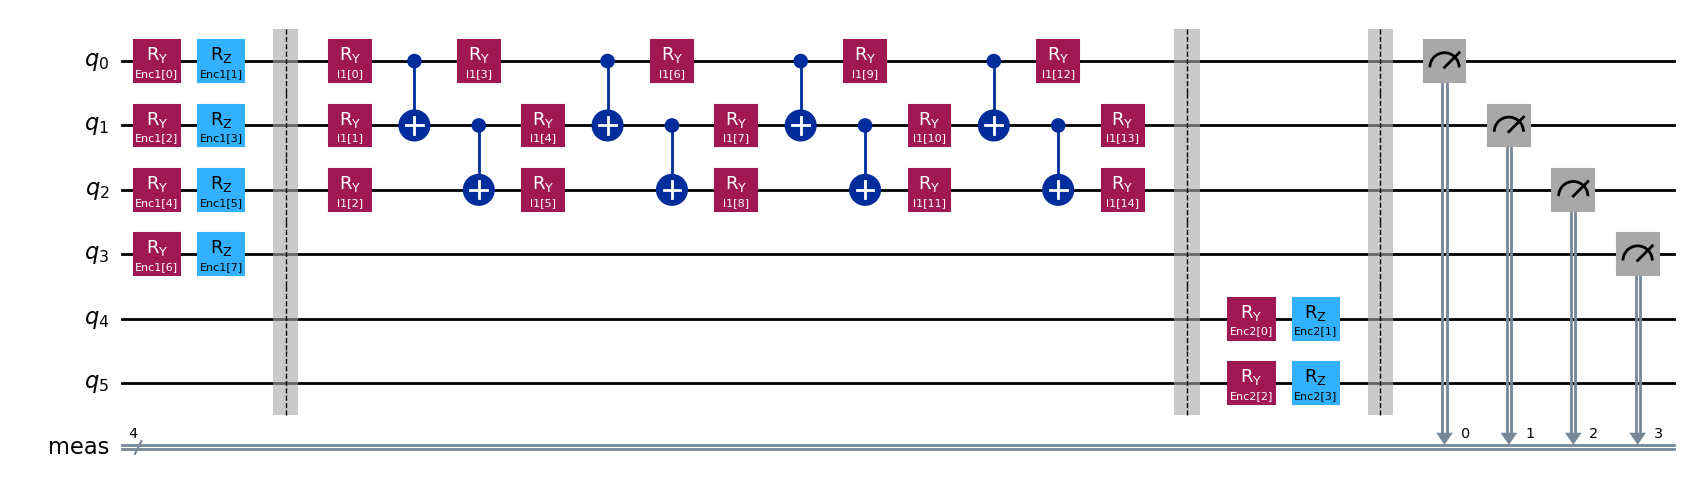

tensor([[0.5600, 0.0000, 0.0900,  ..., 0.0000, 0.0000, 0.0000],
        [0.4400, 0.1000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4800, 0.0800, 0.0400,  ..., 0.0000, 0.0000, 0.0100],
        ...,
        [0.5200, 0.0000, 0.0200,  ..., 0.0000, 0.0000, 0.0000],
        [0.2400, 0.1100, 0.0800,  ..., 0.0000, 0.0100, 0.0100],
        [0.3500, 0.0200, 0.0400,  ..., 0.0000, 0.0200, 0.0100]],
       grad_fn=<SliceBackward0>)

In [2]:
from triqlet.quantum.models import QuantumSamplerModel
from triqlet.quantum.layers import *
import torch


encoder = EncoderLayer(6, [0,1,2,3], 8 , "Enc1", "yz")

ansatz = QuantumSequential(
    RealAmplitudeLayer(6, [0,1,2], "linear", 4, "l1", "L1" ),
    EncoderLayer(6, [4,5], 4 , "Enc2", "yz")

)


a = QuantumSamplerModel(
    circ_qubits=6,
    encoder= encoder,
    ansatz= ansatz,
    shots=100,
    measurement=[0,1,2,3]
)

a.draw(decompose=True)


a(torch.rand((129, 8)))



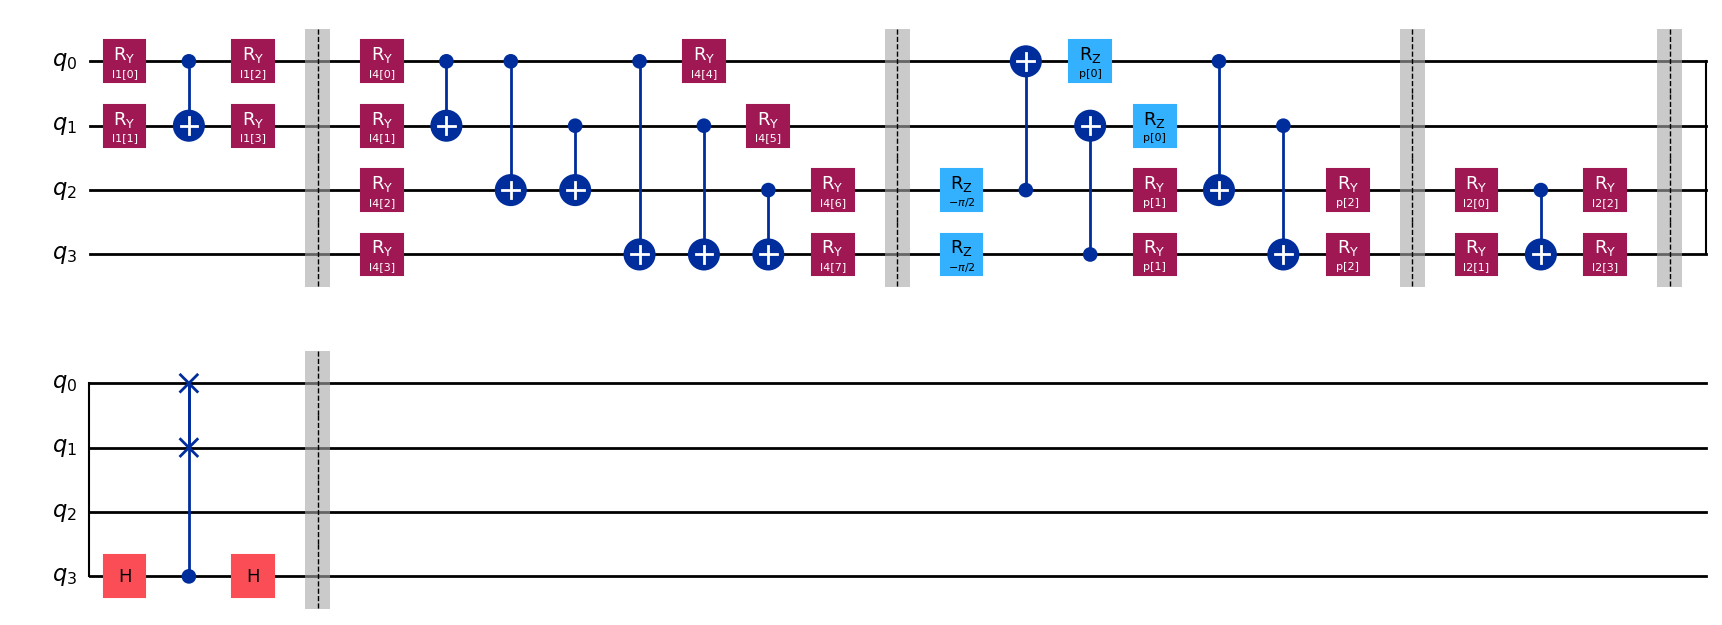

In [28]:
QuantumSequential(
    RealAmplitudeLayer(4, [0,1], "full", 1, "l1", "L1" ),
    RealAmplitudeLayer(4, [0,1,2,3], "full", 1, "l4", "L1" ),
    PoolingLayer(4, [0,1], [2,3], "p", "P1"),
    RealAmplitudeLayer(4, [2,3], "full", 1, "l2", "L2" ),
    SwapTestLayer(4, [0], [1], 3, "mario" )
).decompose().draw("mpl")
